## Чигринець Євгеній

# ЗАВДАННЯ Кластеризація K-Means 

In [1]:
# Імпортуємо пакети
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


from matplotlib import animation

## Огляд даних ##

У вас є супермаркет, через членські картки ви маєте деякі дані про своїх клієнтів, як-от ідентифікатор клієнта (CustomerID), вік (Age), стать (Gender), річний дохід (Annual Income (k$)) і показник витрат (Spending Score (1-100)).
Показник витрат – це параметр, що ви призначаєте клієнту на основі визначених вами параметрів, таких як поведінка клієнта та дані про покупки.

Ваша задача провести кластерний аналіз клієнтів.

Посилання на дані
https://www.kaggle.com/code/vjchoudhary7/kmeans-clustering-in-customer-segmentation/data

In [2]:
df = pd.read_csv('DB.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Our dataset represents 650 examples with 2 features:

In [3]:
print('Розмір даних', df.shape)

Розмір даних (200, 4)


## Візуалізація даних

Давайте поглянемо на дві основні ознаки і подивимось чи можна візуально найти кластери в даних

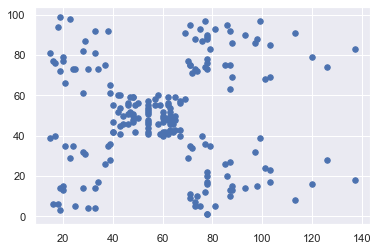

In [4]:
%matplotlib inline

plt.scatter(df['Annual Income (k$)'], df["Spending Score (1-100)"], s=30)
ax = plt.gca()

## Підготовка даних - Задача 1

Оберемо лише дві останні змінні для кластеризації, щоб могти малювати графіки в двовимірному просторі

**!** Не забудьте зашкалювати дані використовуючи [Standart Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [5]:
X = df[['Annual Income (k$)',"Spending Score (1-100)"]]

# Ваш код тут
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
scaller.fit(X)
X = scaller.transform(X)

In [6]:
print('First five examples \n', X[:5])

First five examples 
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


**Expected Output**: 

<table style="width:75%">
    <tr>
        <td><b>First five examples</b></td>
       <td>[[-1.73899919 -0.43480148]<br>
           [-1.70082976 -1.71591298]<br>
           [-1.70082976 -1.71591298]<br>
           [-1.70082976  1.04041783]<br>
           [-1.66266033 -0.39597992]]</td>
    </tr>
    
</table>

## K-Means. Архітектура - Задача 2

K-Means дуже простий алгоритм який розбиває дані на K кластерів. Алгоритм працює наступним чином, ми даємо на вхід дані $x_1,x_2,x_3,…,x_n$ та значення $k$ х кількість кластерів:
1. Оберається $k$ випадкових точок в даних, які будуть центрами майбутніх кластерів - **центроїди**.
2. Для кожної точки $x_i$ ми присвоюємо кластер, який відповідає центрохду який є наближчим до неї за визначеною відстанню.
3. Шукаємо нові центри кластерів (центроїди), для цього рахуємо середнє значення в кожному кластері й середнє точка кластеру, буде новим цинтроїдом.
4. Повторюємо кроки 2 та 3 допоки досягнемо результату, при якому центроїди перестануть змінюватися. 

**Крок 1**

Ми випадковим чином обираємо $k$ центрів кластерів (центроїдів). Позначимо їх $c_1,c_2,…,c_k$.

**Крок 2**

На цьому кроці ми визначаємо для кожної точки найближчий центроїд. У нашому випадку ми буде обчислювати Евклідову відстань для кожної точки $x$, до кожного центроїду $c_i$ :
$$\arg \min_{c_i \in C} ||x - c_i||^2.$$

**Крок 3**

Пошук нових центроїдів за допомогою усереднення всіх точок, що присвоїні даному кластеру:
$$c_i = \frac{1}{\lvert S_i \rvert}\sum_{x_i \in S_i} x_i,$$

$S_i$ це кількість всіх точок як присвоїні кластеру $i_{th}$.


**Крок 4**

Повторюємо *кроки 2* та *3* допоки досягнемо результату, при якому центроїди перестануть змінюватися.

In [7]:
np.random.seed(512)

class KMeans(object):
    """
    Parameters:
    -----------
    X -- np.array
        Matrix of input features
    k -- int
        Number of clusters
    """
    
    def __init__(self, X, k):
        self.X = X
        self.k = k
        
    def initialize_centroids(self):
        """ 
        Returns:
        
        Array of shape (k, n_features), 
            containing k centroids from the initial points
        """
        
        ### START CODE HERE ###
        # Крок 1 
        # використайте numpy shuffle та візьміть k точок 
        # ЗАУВАЖТЕ! ви не повинні змінювати ваші дані X
        
        
        # Ваш код тут
        centroids = self.X.copy()
        
        np.random.shuffle(centroids)
        centroids = centroids[:self.k]

        return centroids
        ### END CODE HERE ###
             
    def closest_centroid(self, centroids):
        """
        Returns:
        
        Array of shape (n_examples, ), 
            containing index of the nearest centroid for each point
        """
        
        ### START CODE HERE ###
        # Крок 2 
        # найдіть найближчий центроїд для кожної точки
        
        
        # Ваш код тут
        distances = np.sqrt(((self.X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
        
        ### END CODE HERE ###
    
    def move_centroids(self, centroids):
        """
        Returns:
        
        Array of shape (n_clusters, n_features),
        containing the new centroids assigned from the points closest to them
        """
        
        ### START CODE HERE ###
        # Крок 3
        # на вході ви отримаєте центроїди, вам потірно найти для кожної точки найближчий (використайте попередню функцію)
        # далі потрібно порахувати нові центроїди (середню точку) і повернути їх як масив
        
        
        # Ваш код тут
        closest = model.closest_centroid(centroids)
        return np.array([self.X[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
        ### END CODE HERE ###
        

    def final_centroids(self):
        """
        Returns:
        
        clusters -- list of arrays, containing points of each cluster
        centroids -- array of shape (n_clusters, n_features),
            containing final centroids 
        
        """
        
        ### START CODE HERE ###
        # Крок 4
        # обєднайте всі попередні меиожи в одну функцію, яка буде шукати нові центроїди допоки не досягне критерію зупинки 
        # (різниця між поточними та наступними центроїдами дуже мала)
        
        
        # Ваш код тут
        centroids = self.initialize_centroids()

        while True:
            old_centroids = centroids

            idx = self.closest_centroid(centroids)
            centroids = self.move_centroids(old_centroids)
            
            clusters = [self.X[np.where(idx == i)[0],:] for i in set(idx)]

            if np.all(old_centroids == centroids):
                break
        ### END CODE HERE ###
        return clusters, centroids

**Initializing our model:**

In [8]:
model = KMeans(X, 3)

**Initializing centroids:**

In [9]:
centroids = model.initialize_centroids()

print('Random centroids:', centroids)

Random centroids: [[ 1.00919971  0.96277471]
 [-1.24279661  0.41927286]
 [-1.39547433  0.88513158]]


**Expected Output**: 

<table style="width:70%">
    <tr>
        <td><b>Random centroids:</b></td>
        <td> [[ 1.00919971  0.96277471]<br>
            [-1.24279661  0.41927286]<br>
            [-1.39547433  0.88513158]]</td>     
    </tr>
</table>

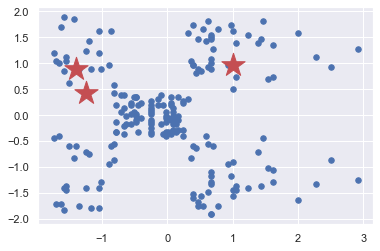

In [10]:
# намалюємо наші центроїди
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Finding closest centroids:**

In [11]:
closest = model.closest_centroid(centroids)
print('Closest centroids:', closest[:10])

Closest centroids: [1 2 1 2 1 2 1 2 1 2]


**Expected Output**: 

<table style="width:45%">
    <tr>
        <td><b>Closest:</b></td>
       <td>  [1 2 1 2 1 2 1 2 1 2] </td> 
    </tr>
    
   
</table>

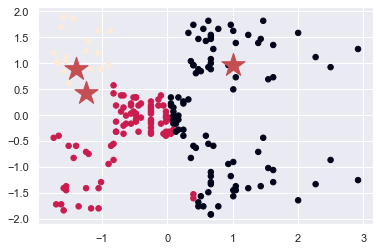

In [12]:
# намалюємо присвоїні кластери
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30, c=closest)
plt.scatter(centroids[:,0], centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

**Move centroids:**

In [13]:
next_centroids = model.move_centroids(centroids)
print('Next centroids:', next_centroids)

Next centroids: [[ 0.84149785  0.05542397]
 [-0.60368059 -0.33865041]
 [-1.35921337  1.19570407]]


**Expected Output**: 

<table style="width:45%">
    <tr>
        <td style="width:15%"><b>Final centroids:</b></td>
       <td>  [[ 0.84149785  0.05542397]<br>
[-0.60368059 -0.33865041]<br>
 [-1.35921337  1.19570407]]</td> 
    </tr>
</table>

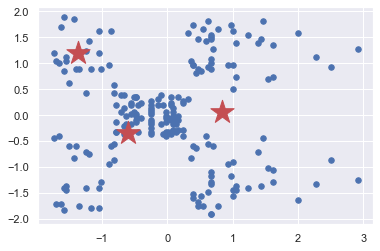

In [14]:
# намалюємо нові центроїди
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(next_centroids[:,0], next_centroids[:,1], s=600, marker='*', c='r')
ax = plt.gca()

In [15]:
clusters, final_centrs = model.final_centroids()
print('Final centroids:', final_centrs)
print('Clusters points:', clusters[0][0], clusters[1][0], clusters[2][0])

Final centroids: [[ 0.99158305  1.23950275]
 [-0.62618966 -0.01439238]
 [ 1.00919971 -1.22553537]]
Clusters points: [0.32214998 1.58391968] [-1.73899919 -0.43480148] [ 0.36031941 -0.82301709]


**Expected Output**: 

<table style="width:45%">
    <tr>
        <td style="width:15%"><b>Final centroids:</b></td>
       <td>  [[ 0.99158305  1.23950275]<br>
 [-0.62618966 -0.01439238]<br>
 [ 1.00919971 -1.22553537]]</td>
    </tr>
    <tr>
        <td><b>Clusters points:</b></td>
       <td>  [-1.73899919 -0.43480148] [0.32214998 1.58391968] [ 0.36031941 -0.82301709] </td>
    </tr>
</table>

Now let's demonstrate performance of the algiritm:

<IPython.core.display.Javascript object>


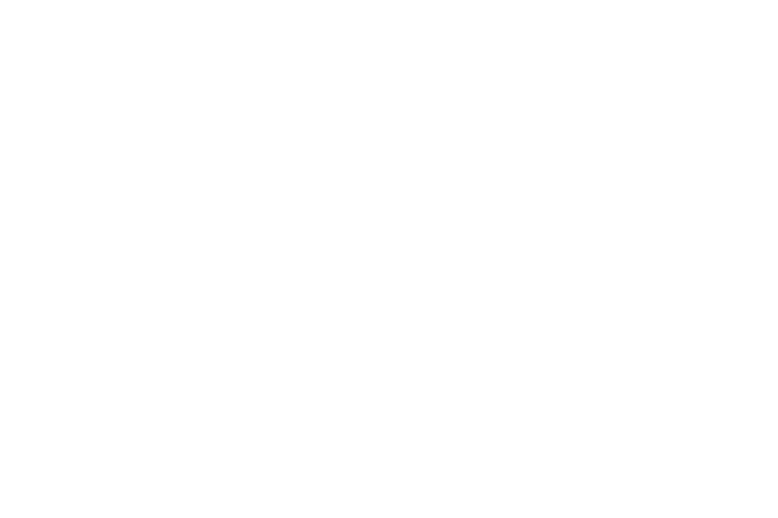

In [16]:
%matplotlib notebook
from IPython.display import HTML

fig = plt.figure()
ax = plt.gca()
centroids = model.initialize_centroids()
line, = ax.plot([], [], 'r*', markersize=15)

def animate(i):
    global centroids
    centroids = model.move_centroids(centroids)
    closest = model.closest_centroid(centroids)
    line.set_data(centroids[:, 0], centroids[:, 1])
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    return line

ani = animation.FuncAnimation(fig, animate, frames=15, interval=150)
HTML(ani.to_jshtml())

## Пошук оптимального значення K - завдання 2

Тепер давайте імплементуємо метод "elbow"  для пошуку оптимального значення k.

Щоб знайти візуально за допомогою «elbow», оптимальну кількість кластерів, нам потрібно обчислити середню суму квадратів відстані між точками та центроїдом всередині кожного кластера.
$$W_k = \frac{1}{k}\sum_{i=1}^{k} \sum_{j}^{n_s} ||x_{ij} - c_i||^2$$
Де $k$ це кількість кластерів, $n_S$ це кількість точок в кластері $S$.

Допишіть функцію для пошуку $W_k$:

In [17]:
def mean_distances(k, X):
    """
    Arguments:

    k -- int, number of clusters
    X -- np.array, matrix of input features

    Returns:

    Array of shape (k, ), containing mean of sum distances 
        from centroid to each point in the cluster for k clusters
    """

    ### START CODE HERE ###
    # задається - максимальна кількість кластерів, ви повинні для усіх кількіостей до k (1,2,3,...k) провести кластеризацію 
    # та обчислити середню суму квадратів відстані між точками та центроїдом всередині кожного кластера
    # результати для кожного k запишіть у масив
    

    # Ваш код тут
    distances = np.zeros((k,)) 

    for k in range(1, k+1):
        model = KMeans(X, k)

        clusters, final_centrs = model.final_centroids()
        idx = model.closest_centroid(final_centrs)


        intertia = np.zeros((k,))
        for j in range(len(final_centrs)):
            cluster = X[np.argwhere(idx==j)]
            intertia[j] = np.sum((np.linalg.norm(final_centrs[j] - cluster)**2))
        distances[k-1] = np.mean(intertia)

    return distances  

    ### END CODE HERE ###

In [18]:
print('Mean distances: ', mean_distances(10, X)) 

Mean distances:  [400.         135.44617973  52.56800272  27.23032915  13.11368163
  10.02214581   7.49976031   5.54044136   3.92588656   3.16615055]


**Expected Output**: 

<table style="width:40%">
    <tr>
        <td><b>Mean distances:</b></td>
       <td>[400.         138.22439037  52.56800272  27.30705677  13.11577116
   9.22955769   6.69376967   4.6536694    3.7752598    3.60217252]</td>
    </tr>
</table>

Let's plot the results:

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs


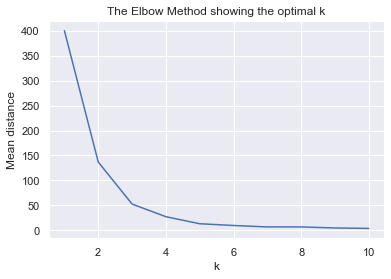

In [19]:
%matplotlib inline
%time

k_clusters = range(1, 11)
distances = mean_distances(10, X)
plt.plot(k_clusters, distances)
plt.xlabel('k')
plt.ylabel('Mean distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<IPython.core.display.Javascript object>


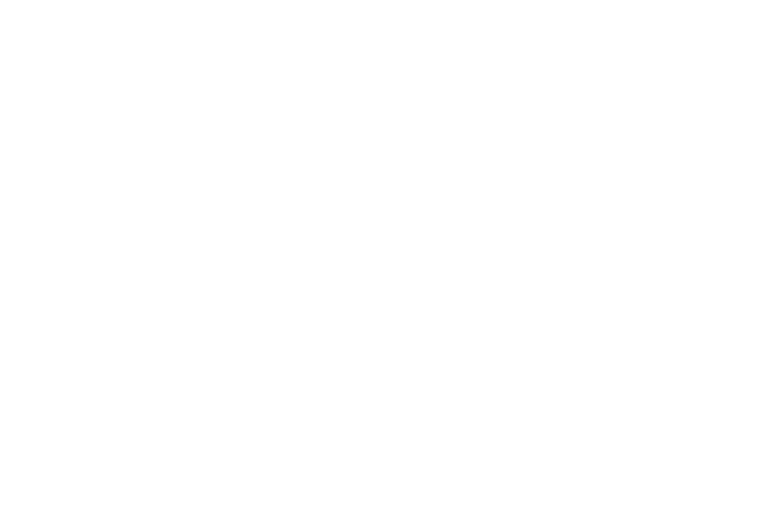

In [20]:
%matplotlib notebook
from IPython.display import HTML

model_new = KMeans(X, 5)
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = model_new.initialize_centroids()

line1, = ax.plot([], [], 'o')
line2, = ax.plot([], [], 'o')

def init():
    
    line1.set_data([], [])
    line2.set_data([], [])
    return line1,line2

def animate(i):
    global centroids
    closest = model_new.closest_centroid(centroids)
    centroids = model_new.move_centroids(centroids)
    ax.cla()
    ax.scatter(X[:, 0], X[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1],  marker='*', c='r', s=600)
    line1.set_data(X[:, 0] , X[:, 1])
    line2.set_data(centroids[:, 0] ,centroids[:, 1])
    return line1, line2

ani = animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)

HTML(ani.to_jshtml())

## Кластеризація Sklearn - завдання 3

Тепер спробуйте використати реалізацію [Kmeans від sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans).

1. Натренуйте Kmeans на нормалізованих двох останніх колонка (атк само як в минулій задачі) та порівняйте результати (чи вийшли подібні кластери та центроїди? наскільки просто і наскілкьи швидко працює sklearn порівняно з вашою реалізацією).
2. Натренуйте kmeans на усіх даних, для цього:
    2.1. Вам потрібно використати [sklearn Label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) щоб закодувати стать 
    2.2 Тепер перетворіть дані використовуючи [Standart Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
    2.3 Натренуйте Kmeans clustering з різними значеннями k. Намалюйте elbow і визначте оптимальну кількітсь кластерів (для коду щоб малювати elbow рекомендую використати код з лекції)
    2.4 Спробуйте описати отримані кластер (середні та медіанні значення по важливих фічах, графіки порівнняня), визначити що в них різниться, що подібне.

## Завдання 1

In [21]:
# Ваш код тут

In [22]:
# Імпортуємо необхідні бібліотеки

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [23]:
df = pd.read_csv('DB.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [24]:
X = df[['Annual Income (k$)',"Spending Score (1-100)"]]

scaller = StandardScaler()
scaller.fit(X)
X = scaller.transform(X)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.67 µs


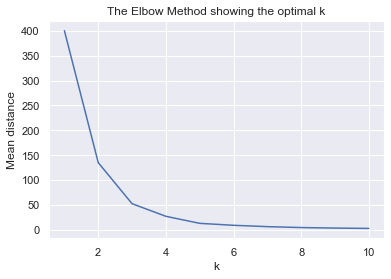

In [25]:
%matplotlib inline
%time

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++' ,random_state=512)
    kmeans.fit(X)
    wcss.append((1/k)*kmeans.inertia_)
    
k_clusters = range(1, 11)
plt.plot(k_clusters, wcss[:])
plt.xlabel('k')
plt.ylabel('Mean distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#####  З графіку бачимо, що оптимальна кількість кластерів = 3

In [26]:
model = KMeans(n_clusters=3, random_state=512)
model.fit(X)

KMeans(n_clusters=3, random_state=512)

In [27]:
model.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537]])

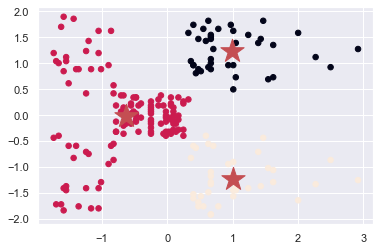

In [28]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30, c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=600, marker='*', c='r')
ax = plt.gca()

### Результат

Порівняши кластери та центроїди, отримані за допомогою sklearn і моєї реалізації, можна стверджувати, що вони ідентичні. Для порівняння були використані графіки та масиви. Також було аналізовано швидкість виконання команд за допомогою %time, таким чином бачимо, що наша реалізація виконується швидше, аніж sklearn. Незважаючи на швидкість виконання коду, я б віддав перевагу sklearn, тому що він суттєво зменшує час, витрачений на написання коду. Написання sklearn потребує пару рядків коду, а моя реалізація потребує написання цілого класу з функціями.

## Завдання 2

In [29]:
df = pd.read_csv('DB.csv', index_col=0)
df_for_scaller = df.copy()

#### Завдання 2.1

In [30]:
LabelEncoder = preprocessing.LabelEncoder()
LabelEncoder.fit(df_for_scaller.Gender)
df_for_scaller.Gender = LabelEncoder.transform(df_for_scaller.Gender)

In [31]:
df_for_scaller.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


#### Завдання 2.2

In [32]:
scaller = StandardScaler()
scaller.fit(df_for_scaller)
X = scaller.transform(df_for_scaller)

#### Завдання 2.3

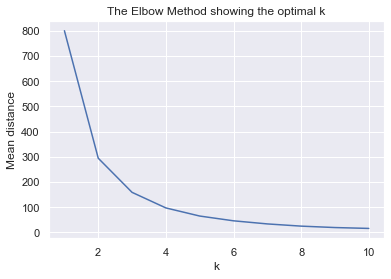

In [33]:
%matplotlib inline
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++' ,random_state=512)
    kmeans.fit(X)
    wcss.append((1/k)*kmeans.inertia_)
    
k_clusters = range(1, 11)
plt.plot(k_clusters, wcss[:])
plt.xlabel('k')
plt.ylabel('Mean distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

In [34]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=512)

In [35]:
clusters = kmeansmodel.fit_predict(X)

#### Завдання 2.4

In [36]:
# к оригинальным данным добавляем номер кластера
df['Номер кластеру'] = clusters
df_res = df.groupby('Номер кластеру')[df.drop('Номер кластеру', axis=1).columns].mean()
df_res['Кількість'] = df.groupby('Номер кластеру').size().values
df_res 

,Age,Annual Income (k$),Spending Score (1-100),Кількість
Номер кластеру,,,,
0,52.511628,59.395349,31.441860,43
1,27.666667,64.933333,64.822222,45
2,28.438596,59.666667,67.684211,57
3,48.109091,58.818182,34.781818,55


#### У мене з'явились сумніви щодо такої кластеризації (0 та 3 кластери і 1 та 2 кластери фактично однакові), тому дізнаємося про розподіл по гендеру

In [37]:
 df.groupby(['Номер кластеру', 'Gender']).agg({'Gender': 'count'})

,,Gender
Номер кластеру,Gender,
0,Male,43
1,Male,45
2,Female,57
3,Female,55


#### Щоб дізнатись більш детальну інформацію, щодо кожного кластеру використаємо код нижче

In [38]:
df[df['Номер кластеру']==0].describe() #Змінюючи номер кластеру, можна отрима повну інформацію про кластер

,Age,Annual Income (k$),Spending Score (1-100),Номер кластеру
count,43.000000,43.000000,43.000000,43.0
mean,52.511628,59.395349,31.441860,0.0
std,11.151280,22.838084,19.066678,0.0
min,33.000000,19.000000,1.000000,0.0
25%,44.500000,45.000000,13.500000,0.0
50%,52.000000,61.000000,36.000000,0.0
75%,61.500000,77.500000,47.500000,0.0
max,70.000000,113.000000,60.000000,0.0


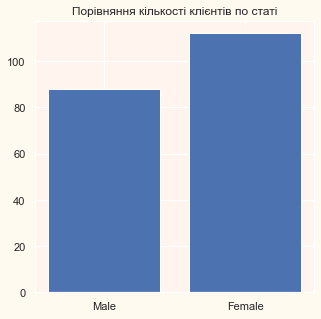

In [39]:
%matplotlib inline

x = ['Male', 'Female']
y = [df[df.Gender == 'Male'].count()[0], df[df.Gender == 'Female'].count()[0]]

fig, ax = plt.subplots()
ax.bar(x, y)

ax.set_facecolor('seashell')
ax.set_title('Порівняння кількості клієнтів по статі')
fig.set_facecolor('floralwhite')
fig.set_figwidth(5)    
fig.set_figheight(5)    

plt.show()

In [40]:
df.groupby(['Номер кластеру', 'Gender']).agg({'Gender': 'count', 'Spending Score (1-100)': 'mean'}).sort_values(by='Spending Score (1-100)')

,,Gender,Spending Score (1-100)
Номер кластеру,Gender,,
0,Male,43,31.441860
3,Female,55,34.781818
1,Male,45,64.822222
2,Female,57,67.684211


### Результат<br>

<li><b>0 кластер</b> - це клієнти віку 33-70 (у середньому 52), їх середній дохід за рік 59к$, використовуючи шкалу 1-100, у середньому вони мають показник витрат 31. <b>Клієнти переважно чоловічої статі,можливо, заходять до супермаркету заради інтересу, скоріш за все будуть зацікавлені товарами зі знижкою або товарами для чоловіків.</b><br><br>

<li><b>1 кластер</b> - це клієнти віку 18-40 (у середньому 28), їх середній дохід за рік 65к$, використовуючи шкалу 1-100, у середньому вони мають показник витрат 65. <b>Потенційні покупці чоловічої статі із середнім доходом та середньою кількістю покупок.</b><br><br>
    
<li><b>2 кластер</b> - це клієнти віку 18-40 (у середньому 28), їх середній дохід за рік 60к$, використовуючи шкалу 1-100, у середньому вони мають показник витрат 68. <b>Потенційні покупці жіночої статі із середнім доходом та середньою кількістю покупок.</b><br><br>

<li><b>3 кластер</b> - це клієнти віку 20-68 (у середньому 48), їх середній дохід за рік 59к$, використовуючи шкалу 1-100, у середньому вони мають показник витрат 35. <b>Клієнти переважно жіночої статі,можливо, заходять до супермаркету заради інтересу, скоріш за все будуть зацікавлені товарами зі знижкою або товарами для жінок.</b><br><br>
    
    
Також можемо помітити, що уцілому дохід жінок та чоловіків приблизно однаковий, якщо їх розділити по групам, але клієнтів жіночої статі більше й показник витрат у них також більший. На мою думку варто збільшити кількість товарів для жінок.
